# **Análise de perfil**

Importação de Bibliotecas

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

In [9]:
# Pala plotar os gráficos:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set(rc={'figure.figsize':(8,5)})

## **Introdução**

Nesta análise encontraremos as principais características de clientes que encerram sua conta no banco analisado no Dataset fornecido. 


In [10]:
tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Diversidade Tech/Técnicas de Programação I/churn (2).csv")
tabela

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Note que temos 10000 clientes sendo analisados neste dataset. Sobre cada cliente, temos as seguintes informações:

In [45]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
 14  FaixaScore       10000 non-null  category
 15  FaixaBalance     10000 non-null  category
dtypes: category(2), float64(2), int64(9), obj

Vemos na linha de código acima que o dataset fornecido possui as seguintes informações sobre cada cliente:

* Número de identificação;
* Sobrenome;
* Pontuação de Crédito: de 0 a 850 (calculado com critérios não especificados no dataset);
* Nacionalidade;
* Gênero;
* Idade;
* Classificação de Estabilidade: de 0 a 10 (calculado com critérios não especificados no dataset);
* Saldo em conta;
* Número de produtos bancários: de 1 a 4;
* Tem ou não Cartão de Crédito;
* É ou não um membro ativo no banco (considera-se um membro inativo aquele que não efetuou transações bancários por um período não determinado no dataset);
* Salário estimado (de acordo com a movimentação mensal registrada);
* Encerrou ou não sua conta no banco em questão. 

Ademais, note que não temos correlações entre as variáveis constantes do dataset. 

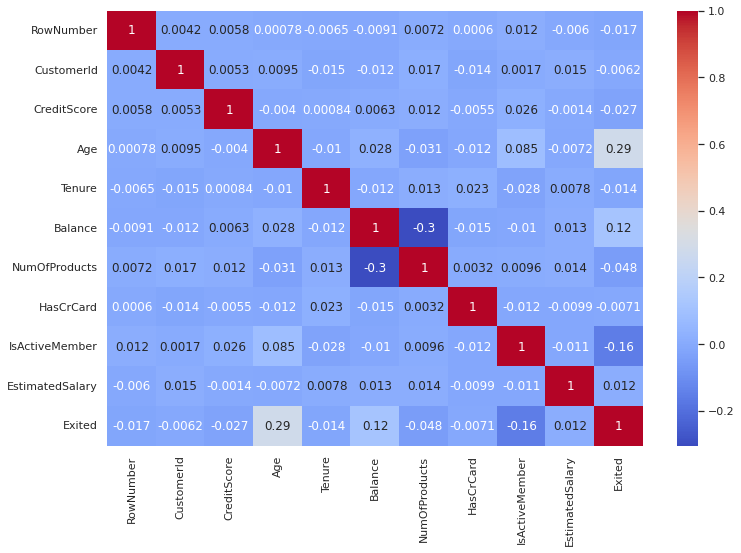

In [12]:
plt.figure(figsize = (12, 8))
sns.heatmap(tabela.corr(), cmap = "coolwarm", annot = True)
plt.show()

A partir de agora analiseremos a relação entre a variável "Exited" (que informa sobre o encerramento da conta) com as demais variáveis, exceto "Número de identificação" e "Sobrenome". 

Utilizaremos a seguinte função na análise:

In [13]:
# Função 1: para análise da distribuição das variáveis.

def dist_churn_por_categoria(coluna):
  coluna_churn = tabela.groupby([coluna, "Exited"]).size()
  coluna = tabela.groupby(coluna).size()
  return (coluna_churn / coluna*100).reset_index(name = "Probabilidade de Exited (em %)").round(2)

# Quantos clientes encerraram sua conta?

Observe a seguir que temos 2037 clientes que encerraram sua conta no banco em questão:

In [15]:
tabela["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Analisando as relações entre o encerramento da conta e as seguintes variáveis:

* Nacionalidade;
* Gênero;
* Idade;
* Classificação de Estabilidade;
* Número de produtos bancários;
* Tem ou não Cartão de Crédito;
* É ou não um membro ativo no banco.

## "Exited" X "Geography":

In [16]:
dist_churn_por_categoria("Geography")

,Geography,Exited,Probabilidade de Exited (em %)
0,France,0,83.85
1,France,1,16.15
2,Germany,0,67.56
3,Germany,1,32.44
4,Spain,0,83.33
5,Spain,1,16.67


A função de distribuição aplicada à variável "Geography" nos mostra que a população alemã tem o dobro de probabilidade de encerrar a conta:

* 16,2% franceses;
* 32,4% alemães;
* 17.7% espanhois.

Podemos constatar isso visualmente através do seguinte gráfico:

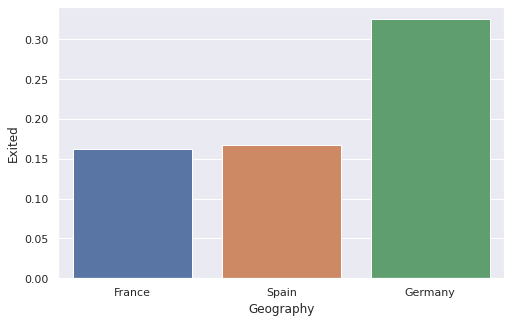

In [61]:
graf_bar_simples("Geography");

## "Exited" X "Gender":

In [18]:
tabela["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
dist_churn_por_categoria("Gender")

,Gender,Exited,Probabilidade de Exited (em %)
0,Female,0,74.93
1,Female,1,25.07
2,Male,0,83.54
3,Male,1,16.46


Nas análises acima observamos que temos mais pessoas do gênero masculino em nosso dataset (5457 pessoas de um total de 10000), mas que as pessoas do gênero feminino são mais propensas a encerrar suas contas: 

*   25% gênero feminino
*   16,5% gênero masculino

Veja a ilustração a seguir onde esta relação está expressa de forma visual:

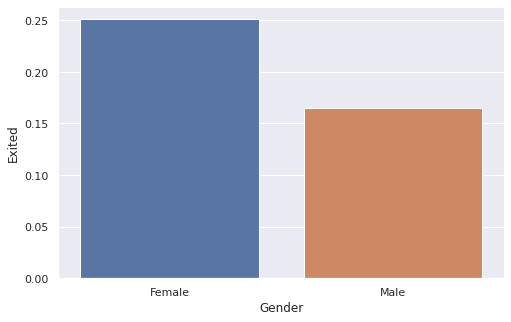

In [62]:
sns.barplot(data=tabela, x="Gender", y="Exited", ci=None);

## "Exited" X "HasCrCard":

In [21]:
dist_churn_por_categoria("HasCrCard")

,HasCrCard,Exited,Probabilidade de Exited (em %)
0,0,0,79.19
1,0,1,20.81
2,1,0,79.82
3,1,1,20.18


Note que, globalmente, possuir cartão de crédito não incluencia na decisão pelo encerramento da conta. 

## "Exited" X "IsActiveMember":


In [22]:
dist_churn_por_categoria("IsActiveMember")

,IsActiveMember,Exited,Probabilidade de Exited (em %)
0,0,0,73.15
1,0,1,26.85
2,1,0,85.73
3,1,1,14.27


Pela distribuição acima, é possível observar que, proporcionalmente, não estar ativo no banco implica em maior possibilidade de encerramento de conta:


*   26,8% de inativos encerram a conta;
*   14,3% de ativos encerram a conta.

Veja a o gráfico a seguir:

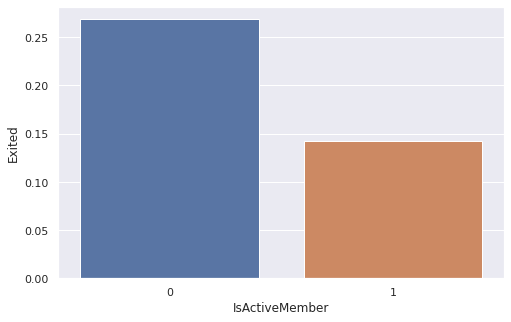

In [63]:
sns.barplot(data=tabela, x="IsActiveMember", y="Exited", ci=None);

## "Exited" X "Tenure":


In [24]:
dist_churn_por_categoria("Tenure")[dist_churn_por_categoria("Tenure")["Exited"] == 1]

,Tenure,Exited,Probabilidade de Exited (em %)
1,0,1,23.00
3,1,1,22.42
5,2,1,19.18
7,3,1,21.11
9,4,1,20.53
11,5,1,20.65
13,6,1,20.27
15,7,1,17.22
17,8,1,19.22
19,9,1,21.65


Pela distribuição acima, é possível observar que, proporcionalmente, a estabilidade não influencia muito na decisão de encerramento da conta. Graficamente, temos:

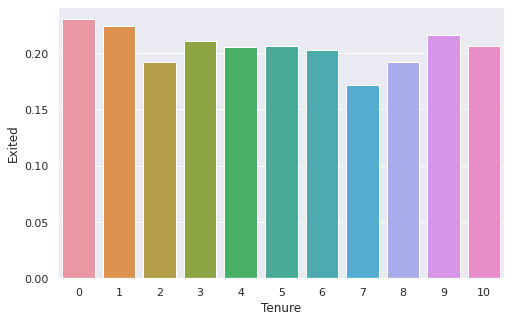

In [64]:
sns.barplot(data=tabela, x="Tenure", y="Exited", ci=None);

## "Exited" X "NumOfProducts":


In [26]:
dist_churn_por_categoria("NumOfProducts")[dist_churn_por_categoria("NumOfProducts")["Exited"] == 1]

,NumOfProducts,Exited,Probabilidade de Exited (em %)
1,1,1,27.71
3,2,1,7.58
5,3,1,82.71
6,4,1,100.00


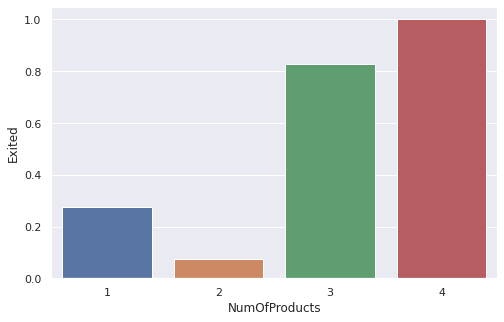

In [65]:
sns.barplot(data=tabela, x="NumOfProducts", y="Exited", ci=None);

Pela distribuição acima, é possível observar que, proporcionalmente, ter 3 ou 4 produtos implica em maior possibilidade de encerramento de conta:


*   27,7% dos que tem 1 produto encerram a conta.
*   7,6% dos que tem 2 produto encerram a conta.
*   82,7% dos que tem 3 produto encerram a conta.
*   100% dos que tem 4 produto encerram a conta.

# Compreendendo mais sobre as relações estudadas acima.

Neste momento estamos interessados em observar graficamente as relações entre a variável "Exited" e as demais variáveis categóricas analisadas acima, porém combinadas 2 a 2.

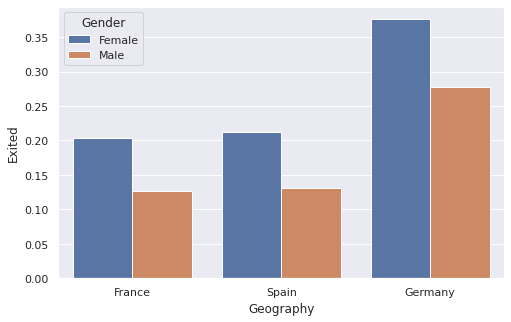

In [66]:
sns.barplot(data=tabela, x="Geography", y="Exited", hue = "Gender", ci=None);

Note que independentemente da localização, mulheres tem maior probabilidade de encerramento de conta.

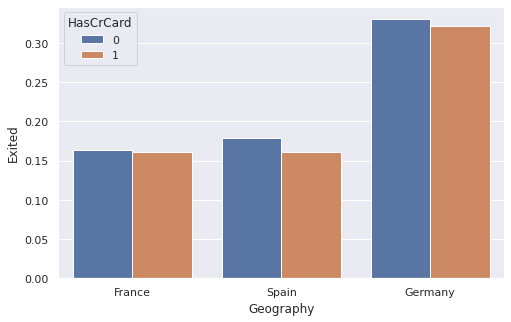

In [67]:
sns.barplot(data=tabela, x="Geography", y="Exited", hue = "HasCrCard", ci=None);

Note que na Espanha, não ter cartão de crédito é algo que influencia ligeiramente o encerramento da conta. Embora tenhamos concluído que, globalmente, este não seja um fator determinante para o encerramento de conta.


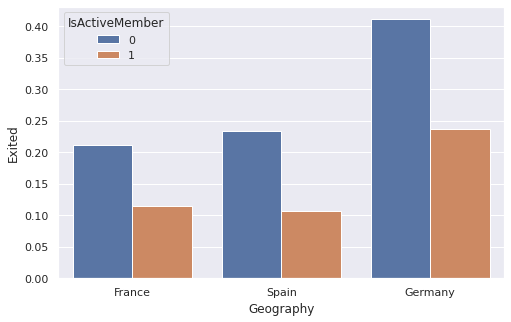

In [68]:
sns.barplot(data=tabela, x="Geography", y="Exited", hue = "IsActiveMember", ci=None);

Na Alemanha, a probabilidade de membros inativos saírem é maior. 

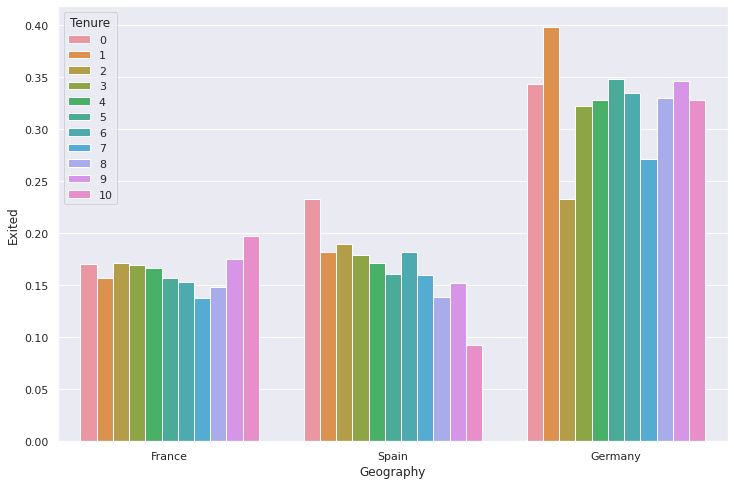

In [47]:
plt.figure(figsize = (12, 8))
sns.barplot(data=tabela, x="Geography", y="Exited", hue = "Tenure", ci=None);

Na alemãnha, pessoas com Tenure 0 ou 1 probabilidade de sair maior do que nos demais países. 

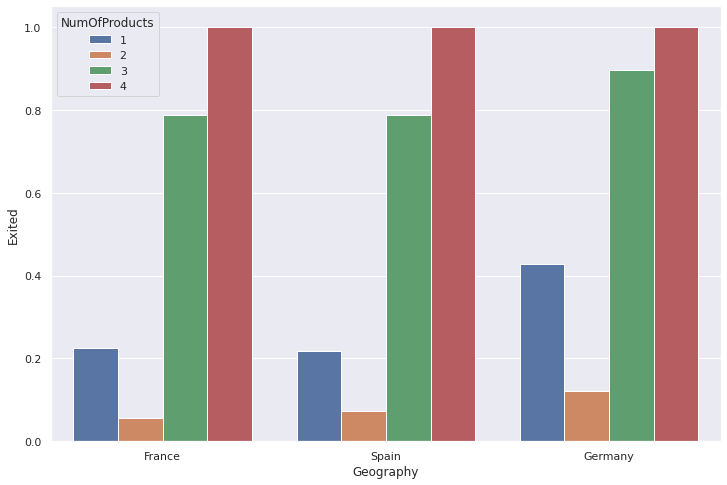

In [69]:
plt.figure(figsize = (12, 8))
sns.barplot(data=tabela, x="Geography", y="Exited", hue = "NumOfProducts", ci=None);

Aqui vemos que independentemente do país, ter 3 ou 4 prtodutos implica fortemente o encerramento da conta. Ademais, na Alemanha, tendo 3 produtos, a probalidade de churn é maior que nos demais países. 

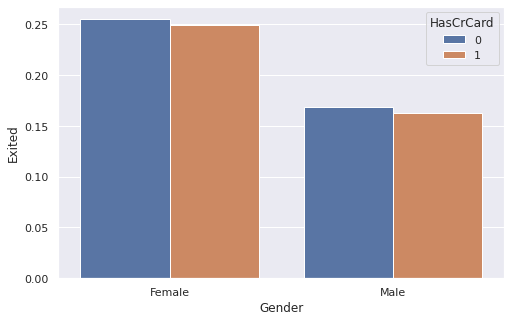

In [48]:
sns.barplot(data=tabela, x="Gender", y="Exited", hue = "HasCrCard", ci=None);

Aqui revemos que mulheres saem mais que homens. 

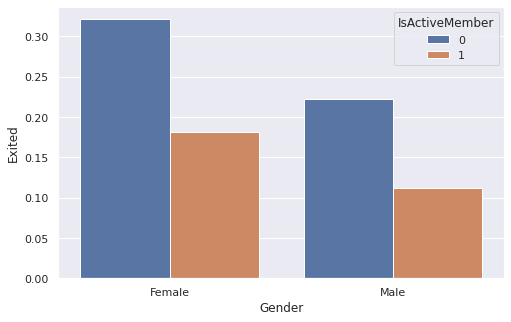

In [49]:
sns.barplot(data=tabela, x="Gender", y="Exited", hue = "IsActiveMember", ci=None);

Vemos que, entre as mulheres, temos mais membros inativos. 

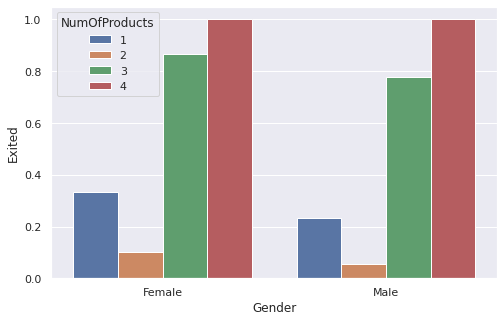

In [50]:
sns.barplot(data=tabela, x="Gender", y="Exited", hue = "NumOfProducts", ci=None);

Aqui vemos que mulheres tem maior probabilidade de churn independentemente do número de produtos.

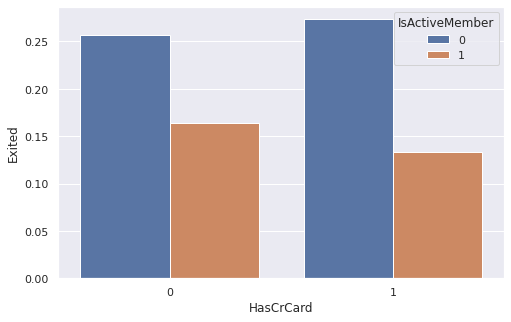

In [51]:
sns.barplot(data=tabela, x="HasCrCard", y="Exited", hue = "IsActiveMember", ci=None);

Mais uma vez vemos que ter cartão de crédito não é um fator muito preponderante para o churn. 

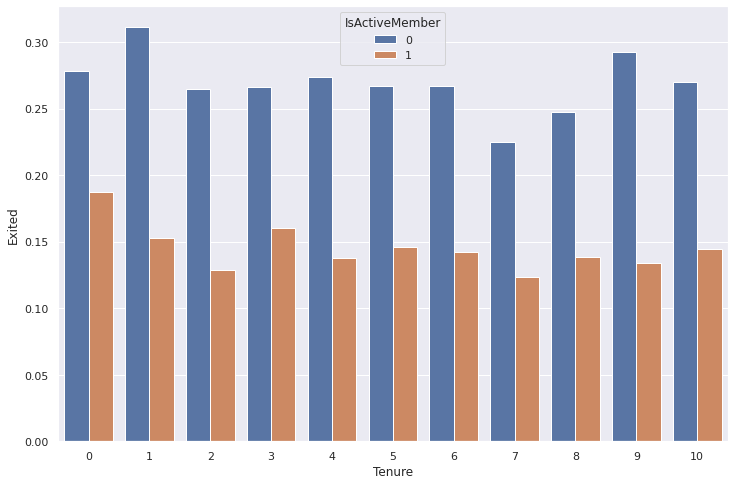

In [54]:
plt.figure(figsize = (12, 8))

sns.barplot(data=tabela, x="Tenure", y="Exited", hue = "IsActiveMember", ci=None);

Independentemente do Tenure, ser membro inativo implica em maior probabilidade de churn.

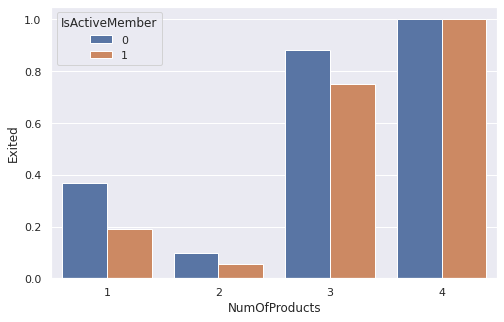

In [55]:
sns.barplot(data=tabela, x="NumOfProducts", y="Exited", hue = "IsActiveMember", ci=None);

Independentemente do número de produtos, ser membro inativo implica em maior probabilidade de churn. 

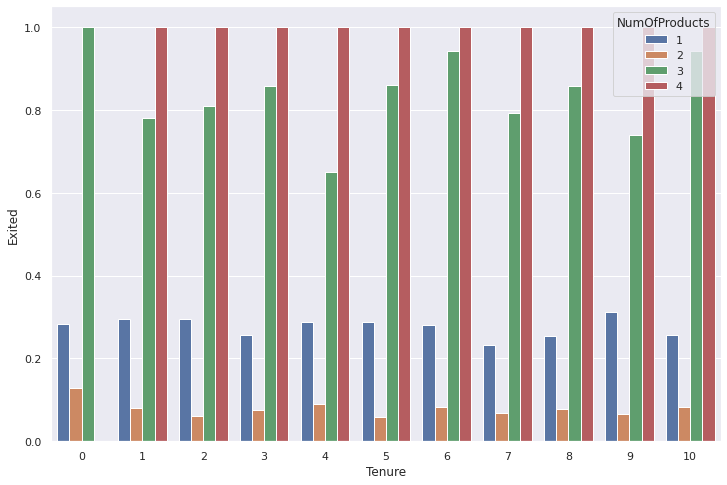

In [56]:
plt.figure(figsize = (12, 8))

sns.barplot(data=tabela, x="Tenure", y="Exited", hue = "NumOfProducts", ci=None);

O cliente que possui Tenure igual a zero não possui 4 produtos bancários. Além disso, o cliente que possui Tenure igual a zero e 3 produtos encerra a conta.

# Analisando as relações entre o encerramento de conta e:

* Pontuação de Crédito;
* Idade;
* Saldo em conta;
* Salário estimado.

Antes vamos visualizar a amplitude dos dados a serem analisados:

In [40]:
tabela[["CreditScore","Age" , "Balance", "EstimatedSalary"]].apply(lambda x: x.max() - x.min() )

CreditScore           500.00
Age                    74.00
Balance            250898.09
EstimatedSalary    199980.90
dtype: float64

## "Exited" X "CreditScore":

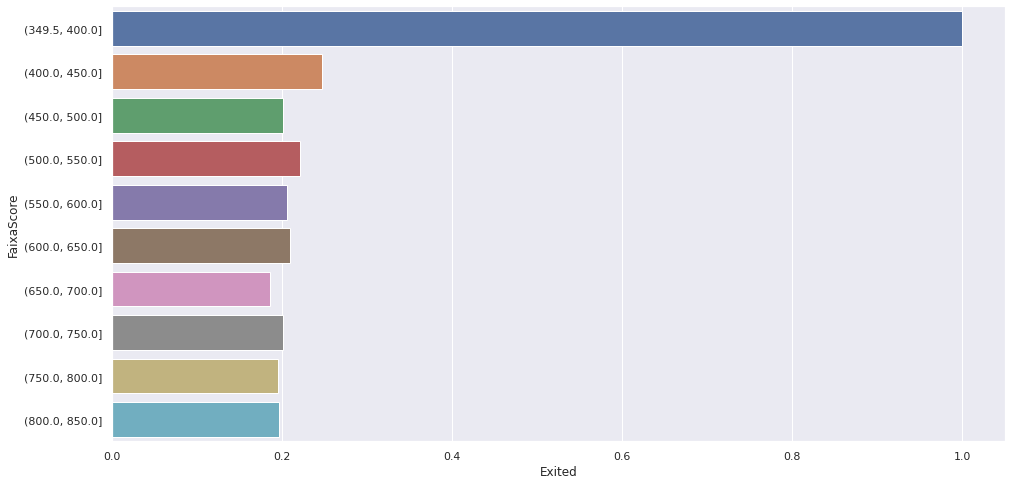

In [58]:
tabela["FaixaScore"] = pd.cut(tabela["CreditScore"], 10)
plt.figure(figsize = (16, 8))
sns.barplot(data=tabela, y="FaixaScore", x="Exited", ci=None);

Todos os membros com Score até 400, encerram a conta. 

## "Exited" X "Age":

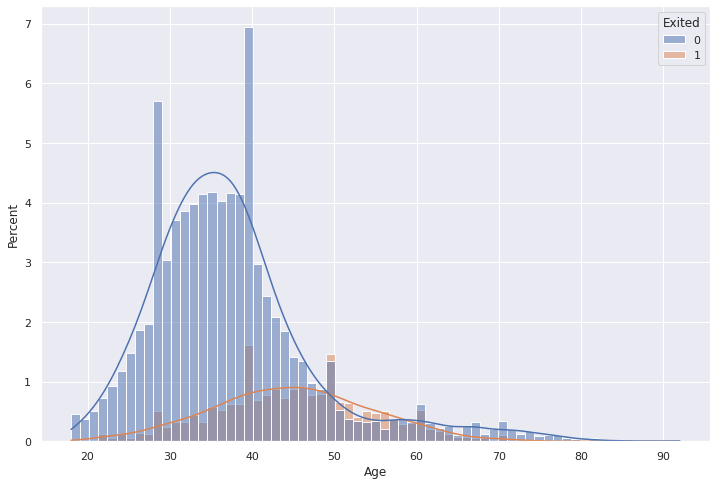

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(data=tabela, x="Age", stat="percent", hue="Exited", kde=True)
plt.show()

Note que a distribuição das idades está deslocada para a esquerda, a maioria dos correntistas tem entre 18 e 50 anos.

A distribuição de churn não está deslocada, mas concentra-se na faixa de idade [40,60]

## "Exited" X "Balance":

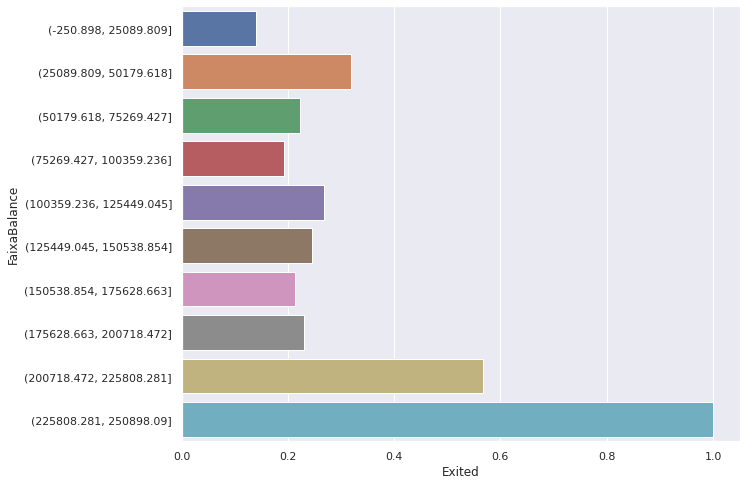

In [59]:
tabela["FaixaBalance"] = pd.cut(tabela["Balance"], 10)
plt.figure(figsize = (10, 8))
sns.barplot(data=tabela, y="FaixaBalance", x="Exited", ci=None);

Note que os clientes que possuem mais dinheiro guardado saem. A última faixa de Balance tem probabilidade de Exited igual a um. 

## "Exited" X "EstimatedSalary":

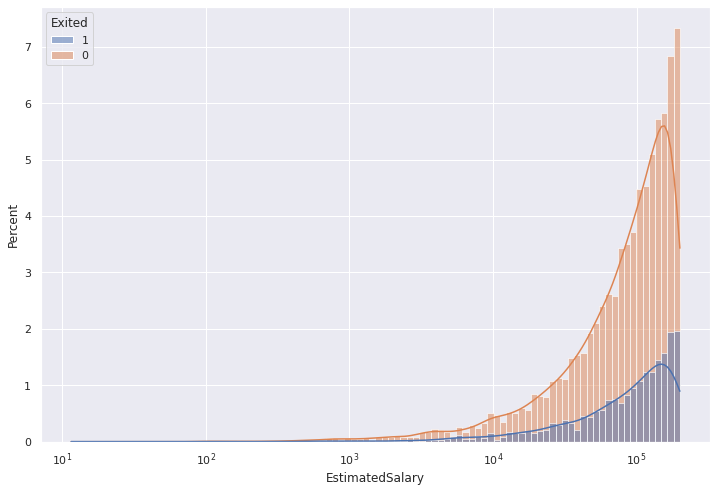

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(data=tabela, x="EstimatedSalary", stat="percent", 
             hue="Exited", hue_order=(1,0), kde=True, log_scale=True)
plt.show()

O salário estimado não influencia na decisão pelo encerramento da conta. 

# **Características dos clientes que encerraram a conta**

Das 2037 pessoas que saíram:

* 1009 tem entre 45 e 65 anos.
* 1139 são mulheres.
* 814 são Alemães.
* 208 tem 3 ou 4 produtos.
* 150 tem Score menor que 500.

Olhando pela localidade:

* 16,2% franceses;
* 32,4% alemães;
* 17.7% espanhois.

Temos mais pessoas do gênero masculino em nosso dataset (5457 pessoas de um total de 10000), mas as pessoas do gênero feminino são mais propensas a encerrar suas contas: 

*   25% gênero feminino
*   16,5% gênero masculino

Isso ocorre independentemente da localização e do número de produtos. 

Possuir cartão de crédito não influencia, globalmente, na decisão pelo encerramento da conta. Porém, na Espanha, não ter cartão de crédito é algo que influencia ligeiramente o encerramento da conta. 


Proporcionalmente (e independentemente do Tenure e do número de produtos), não estar ativo no banco implica em maior possibilidade de encerramento de conta:

*   26,8% de inativos encerram a conta;
*   14,3% de ativos encerram a conta.

Este fato se acentua  na Alemanha, pois a probabilidade de membros alemães inativos saírem é maior. 
Ademais, entre as mulheres, temos mais membros inativos. 


Globalmente, a estabilidade não influencia muito na decisão de encerramento da conta. Porém,  na alemãnha, pessoas com Tenure iguais a 0 ou 1, tem probabilidade de churn maior do que nos demais países. 
Clientes que possuem Tenure igual a zero e 3 produtos encerram a conta.



Ter 3 ou 4 produtos implica em maior possibilidade de encerramento de conta:

*   27,7% dos que tem 1 produto encerram a conta.
*   7,6% dos que tem 2 produto encerram a conta.
*   82,7% dos que tem 3 produto encerram a conta.
*   100% dos que tem 4 produto encerram a conta.

Além disso, na Alemanha, tendo 3 produtos, a probalidade de churn é maior do que nos demais países. 

Os membros com Score até 400, encerram a conta. 

A maioria dos clientes do banco tem entre 25 e 45 anos, porém a maioria dos clientes que encerram suas contas tem entre 40 e 60 anos.

Os clientes que possuem mais dinheiro guardado saem. Por outro lado, o salário estimado não influencia na decisão pelo encerramento da conta.